In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
corr = df.corr()
corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


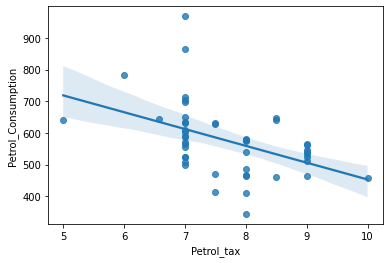

In [ ]:
p_coef, p_val = stats.pearsonr(df['Petrol_tax'], df['Petrol_Consumption'])
import seaborn as sns
sns.regplot(x = 'Petrol_tax', y = 'Petrol_Consumption', data = df)

In [ ]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

In [ ]:
df.shape

(48, 5)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
pred = tree.predict(X_test)

In [ ]:
df_ = pd.DataFrame({'Actual': y_test, 'Pred': pred})
df_

,Actual,Pred
29,534,553.750000
4,410,466.714286
26,577,672.250000
30,571,672.250000
32,577,672.250000
37,704,603.090909
34,487,672.250000
40,587,649.000000
7,467,466.714286
10,580,466.714286


In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, pred)

89.59956709956708

In [ ]:
from scipy import stats
p_coef, p_val = stats.pearsonr(df['Petrol_Consumption'], df['Petrol_tax'])
p_coef, p_val


(-0.45128027518698666, 0.0012848906734289317)

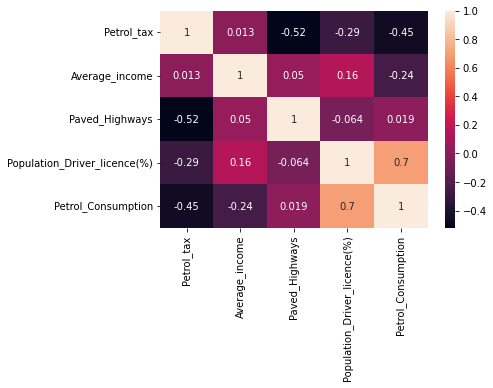

In [ ]:
sns.heatmap(df.corr(),annot=True)


In [ ]:
tree.feature_importances_
pd.Series(tree.feature_importances_, index = X.columns).sort_values(ascending=False)


Population_Driver_licence(%)    0.545702
Average_income                  0.375326
Petrol_tax                      0.049900
Paved_Highways                  0.029072
dtype: float64